![Logo EHTP](ehtplogo.jpg)

# <div style="text-align:center"> EHTP <font color='green'> -  </font>  Master Spécialisé Data Engineering 2019/2020 </div>
# <div style="text-align:center"> Module <font color='green'> 3 </font>  : Python for Data Science </div>

### <div style="text-align:center"> <font color='green'> Author </font>  : El Missaoui Issam </div>

# <br> <font color='green'> -  Capstone Project Introduction    -  </font>                    

The present project consists in processing and analyzing a dataset from the 2004 population and housing census of the Marrakech Tansift Al Haouz region containing the demographic characteristics for the communes, using the Python language and Web Dynamic Scarping and Crawling to collect 2014 data and compare to 2004 data.

For this, we will use the following libraries: 

- Numpy: Processing
- Pandas: DataFrame and Series Processing
- Matplotlib: Visualization
- Seaborn (optional): Visualization
- Plotly & Cufflinks : Interactive Visualization
- Selenium : Web Scraping and automation.

We have two files in hand; the first is our main dataset and the second is an auxiliary giving the code and names of the provinces: 
    1. Recensement_RGPH2004_RegionMTA.xlsx
    2. Code_Nom_Province.csv
    

Our dataset contains the following fields: 

- <B> ID </B> : Numerical identifier assigned to the commune
- <B>  Nom_Commune </B> 	: Name of the commune
- <B>  Code_Commune </B> 	: Code of the commune
- <B> Type_Commune </B> 	: Type of the commune (urban or rural)
- <B> Surface_ha </B> 	: Surface of the commune in hectare
- <B> Population </B> 	: Population of the commune 
- <B> Pop_inf6_pc </B> 	: Percentage of the population under 6 years of age
- <B> Pop_615_pc </B> 	: Percentage of the population between 6 and 15 years old
- <B> Pop_1560_pc </B> 	: Percentage of the population between 15 and 60 years old
- <B> Pop_sup60_pc </B> 	:  Percentage of the population over 60 years of age
- <B>  Celebataire_pc </B> 	: Percentage of the population with a single marital status
- <B> Marie_pc	</B> :  Percentage of population with married status
- <B> Mrge_Autre_pc </B> 	: Percentage of population with other marital status
- <B> Age_Moyen_1marriage </B> 	: Average age at first marriage
- <B> Taux_Analphabetisme </B> 	: Illiteracy rate of the commune's population
- <B> Taux_activite </B> 	: Activity rate of the population of the commune

The remainder of this notebook is presented in a question-and-answer format.

# <br> <font color='green'> - Partie 1 -   </font>                    

## Question 1

####  Data import and configuration

import processing and visualization libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

import seaborn as sns
import requests

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import cufflinks as cf
import plotly.express as px

init_notebook_mode(connected=True)
cf.go_offline()

set %matplotlib inline

In [5]:
%matplotlib inline

Load the excel file in a dataframe 'dfc'.

In [6]:
dfc = pd.read_excel('Recensement_RGPH2004_RegionMTA.xlsx')

## Question 2

Show the first ten rows.

In [7]:
dfc.head(10)

,ID,Nom_Commune,Code_Commune,Type_Commune,Surface_ha,Population,Pop_inf6_pc,Pop_615_pc,Pop_1560_pc,Pop_sup60_pc,Celebataire_pc,Marie_pc,Mrge_Autre_pc,Age_Moyen_1marriage,Taux_Analphabetisme,Taux_activite
0,1,ABADOU,041.03.01,Rural,9504.74,9905,13.6,24.1,53.7,8.6,31.8,61.1,7.1,25.6,58.3,40.6
1,2,ADAGHAS,211.05.01,Rural,9266.43,3321,17.2,24.3,48.5,10.0,29.3,63.9,6.8,25.3,68.1,37.6
2,3,ADASSIL,161.07.01,Rural,14560.61,7212,15.4,26.9,49.8,7.9,27.4,65.5,7.1,24.7,78.2,48.0
3,4,AFALLA ISSEN,161.05.01,Rural,12295.32,7961,15.4,25.5,51.5,7.6,33.5,59.6,6.9,26.8,85.3,35.2
4,5,AGAFAY,351.05.01,Rural,18889.36,11079,12.7,20.8,59.3,7.2,34.5,59.0,6.6,27.1,59.4,32.1
5,6,AGHBAR,041.07.01,Rural,24085.94,4608,18.4,25.8,48.4,7.4,22.1,71.3,6.5,22.0,90.1,32.3
6,7,AGLIF,211.05.03,Rural,19199.77,8934,15.7,25.3,49.0,9.9,30.4,62.4,7.1,25.8,77.4,28.0
7,8,AGUERD,211.05.05,Rural,8897.58,4917,12.7,20.2,55.2,11.9,32.3,60.7,7.0,26.9,72.2,42.1
8,9,AHDIL,161.03.01,Rural,45308.68,11764,15.3,25.3,51.9,7.4,35.7,58.8,5.5,26.2,74.0,36.4
9,10,AIN TAZITOUNTE,161.05.03,Rural,9943.05,5947,15.0,24.6,51.1,9.3,33.9,58.1,8.0,26.5,73.2,31.2


Show the last ten rows.

In [8]:
dfc.tail(10)

,ID,Nom_Commune,Code_Commune,Type_Commune,Surface_ha,Population,Pop_inf6_pc,Pop_615_pc,Pop_1560_pc,Pop_sup60_pc,Celebataire_pc,Marie_pc,Mrge_Autre_pc,Age_Moyen_1marriage,Taux_Analphabetisme,Taux_activite
207,208,TIMLILT,161.09.15,Rural,24948.94,7186,15.8,24.2,51.2,8.8,36.1,58.4,5.5,26.9,77.6,27.9
208,209,TIZGUINE,041.05.19,Rural,5216.43,3886,11.3,19.7,55.2,13.8,26.4,63.8,9.7,25.5,60.9,29.6
209,210,TLAUH,191.09.19,Rural,9412.40,9901,13.2,21.2,57.7,7.9,35.0,59.2,5.8,27.0,58.9,34.4
210,211,TOUAMA,041.03.27,Rural,12115.52,11458,11.5,19.8,58.7,10.0,37.4,55.5,7.1,28.4,63.1,36.7
211,212,ZAOUIAT ANNAHLIA,161.07.15,Rural,16721.78,15942,15.1,23.7,54.1,7.1,34.4,60.4,5.1,26.2,71.4,35.2
212,213,ZAOUIAT BEN HMIDA,211.03.51,Rural,6361.56,6395,13.3,20.2,55.9,10.6,35.1,57.5,7.4,26.8,67.2,32.5
213,214,ZEMRANE,191.05.31,Rural,19353.68,15996,12.7,21.5,57.3,8.4,35.3,59.0,5.8,26.6,61.7,33.0
214,215,ZEMRANE CHARQIA,191.05.33,Rural,21809.44,27408,11.4,21.0,59.0,8.5,36.9,56.1,7.0,27.6,55.4,34.5
215,216,ZERKTEN,041.03.29,Rural,39117.49,19124,13.6,24.1,54.4,7.9,33.8,59.4,6.8,25.4,72.9,36.3
216,217,ZNADA,191.03.41,Rural,4625.65,8830,13.5,22.9,57.5,6.1,32.5,61.3,6.2,25.6,57.5,31.9


Optional '': Display the number of observations and variables as well as their types.

In [9]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 16 columns):
ID                     217 non-null int64
Nom_Commune            217 non-null object
Code_Commune           217 non-null object
Type_Commune           217 non-null object
Surface_ha             217 non-null float64
Population             217 non-null int64
Pop_inf6_pc            217 non-null float64
Pop_615_pc             217 non-null float64
Pop_1560_pc            217 non-null float64
Pop_sup60_pc           217 non-null float64
Celebataire_pc         217 non-null float64
Marie_pc               217 non-null float64
Mrge_Autre_pc          217 non-null float64
Age_Moyen_1marriage    217 non-null float64
Taux_Analphabetisme    217 non-null float64
Taux_activite          217 non-null float64
dtypes: float64(11), int64(2), object(3)
memory usage: 27.2+ KB


## Question 3

Calculate the statistics (min, max, mean, median, sum and standard deviation) of the variables 'Population' et 'Surface_ha'

In [10]:
print(dfc[['Population', 'Surface_ha']].describe().T[['mean', 'std', 'min', 'max','50%']])
print('Sum of the population : ', dfc['Population'].sum())
print('Sum of the surface : ', round(dfc['Surface_ha'].sum(),2), 'ha')

                    mean           std      min        max       50%
Population  14231.972350  26408.711418  2497.00  280275.00   8382.00
Surface_ha  14780.494194  11086.244348   608.97   73905.83  11335.56
Sum of the population :  3088338
Sum of the surface :  3207367.24 ha


## Question 4

Delete the column 'ID' from the Dataframe.

In [11]:
dfc.drop('ID', axis=1, inplace=True)

In [12]:
dfc.head()

,Nom_Commune,Code_Commune,Type_Commune,Surface_ha,Population,Pop_inf6_pc,Pop_615_pc,Pop_1560_pc,Pop_sup60_pc,Celebataire_pc,Marie_pc,Mrge_Autre_pc,Age_Moyen_1marriage,Taux_Analphabetisme,Taux_activite
0,ABADOU,041.03.01,Rural,9504.74,9905,13.6,24.1,53.7,8.6,31.8,61.1,7.1,25.6,58.3,40.6
1,ADAGHAS,211.05.01,Rural,9266.43,3321,17.2,24.3,48.5,10.0,29.3,63.9,6.8,25.3,68.1,37.6
2,ADASSIL,161.07.01,Rural,14560.61,7212,15.4,26.9,49.8,7.9,27.4,65.5,7.1,24.7,78.2,48.0
3,AFALLA ISSEN,161.05.01,Rural,12295.32,7961,15.4,25.5,51.5,7.6,33.5,59.6,6.9,26.8,85.3,35.2
4,AGAFAY,351.05.01,Rural,18889.36,11079,12.7,20.8,59.3,7.2,34.5,59.0,6.6,27.1,59.4,32.1


## Question 5

The number of unique values in the column 'Nom_Commune'.

In [13]:
dfc['Nom_Commune'].nunique()

215

The frequency of the values in the column 'Nom_Commune'.

In [14]:
dfc['Nom_Commune'].value_counts().head(5)

SIDI GHANEM               3
OULAD CHERKI              1
SIDI AISSA BEN SLIMANE    1
OULAD IMLOUL              1
NFIFA                     1
Name: Nom_Commune, dtype: int64

## Question 6

The commune with the highest activity rate.

In [15]:
dfc[dfc['Taux_activite'] == max(dfc['Taux_activite'])]['Nom_Commune']

168    SIDI HMAD OU MBAREK
Name: Nom_Commune, dtype: object

The commune with the lowest activity rate.

In [16]:
dfc.loc[dfc['Taux_activite'].idxmin()]['Nom_Commune']

'LALLA AAZIZA'

## Question 7

Communes with a population of more than 10,000 and an illiteracy rate of more than 40%.

In [17]:
dfc[(dfc['Population'] > 10000) & (dfc['Taux_Analphabetisme'] > 40)]['Nom_Commune'].nunique()  

70

In [18]:
dfc[(dfc['Population'] > 10000) & (dfc['Taux_Analphabetisme'] > 40)]['Nom_Commune'].unique()

array(['AGAFAY', 'AHDIL', 'AIT FASKA', 'AIT IMOUR', 'AIT SIDI DAOUD',
       'ALOUIDANE', 'ANNAKHIL', 'AQERMOUD', 'ASNI', 'ASSAHRIJ',
       'BOUABOUT', 'BOUYA OMAR', 'DOUIRANE', 'FRAITA', 'GHMATE', 'HARBIL',
       'IGUERFEROUANE', 'JAAFRA', 'JAIDATE', 'JBIEL', 'JOUALA',
       'KORIMATE', 'LAATAMNA', 'LAATAOUIA', 'LABRIKIYNE', 'LAMHARRA',
       'LAMZOUDIA', 'LOUDAYA', 'MAJJAT', 'MAYATE', 'MNABHA',
       'MOULAY BRAHIM', 'MZOUDA', 'NZALAT LAADAM', 'OUAHAT SIDI BRAHIM',
       'OUARGUI', 'OULAD DLIM', 'OULAD HASSOUNE', 'OULAD ZARRAD',
       'OUNAGHA', 'OURIKA', 'RAS AIN RHAMNA', 'SAADA', 'SID LMOKHTAR',
       'SID ZOUINE', 'SIDI ABDALLAH', 'SIDI ABDALLAH GHIAT',
       'SIDI AISSA BEN SLIMANE', 'SIDI BOU OTHMANE', 'SIDI GHANEM',
       'SIDI LAAROUSSI', 'SKHOUR RHAMNA', 'SOUIHLA', 'STI FADMA',
       'TAHANNAOUT', 'TAKATE', 'TAMAGUERT', 'TAMALLALT', 'TAMAZOUZTE',
       'TAMESLOHTE', 'TAOULOUKOULT', 'TASSOULTANTE', 'TAZART',
       'TIDILI MESFIOUA', 'TIGHEDOUINE', 'TOUAMA', 'ZAOUI

## Question 8

Communes whose name begins or ends with the letter 'A'.

Method 1 : (function)

In [19]:
def Acomm(x):
    n = len(x)
    if x[0] == 'A' :
        return(x)
    elif x[n-1] == 'A':
        return (x)    

In [20]:
dfc['Nom_Commune'].apply(lambda x:Acomm(x)).unique()

array(['ABADOU', 'ADAGHAS', 'ADASSIL', 'AFALLA ISSEN', 'AGAFAY', 'AGHBAR',
       'AGLIF', 'AGUERD', 'AHDIL', 'AIN TAZITOUNTE', 'AIT AADEL',
       'AIT AISSI IHAHANE', 'AIT DAOUD', 'AIT FASKA',
       'AIT HADDOU YOUSSEF', 'AIT HADI', 'AIT HAMMOU',
       'AIT HKIM AIT IZID', 'AIT IMOUR', 'AIT OURIR', 'AIT SAID',
       'AIT SIDI DAOUD', 'AIT TALEB', 'AKARMA', 'ALOUIDANE', 'AMGHRAS',
       'AMIZMIZ', 'ANNAKHIL', 'ANOUGAL', 'AQERMOUD', 'ASNI', 'ASSAHRIJ',
       'ASSAIS', 'ASSIF EL MAL', 'AZGOUR', None, 'CHICHAOUA', 'CHOARA',
       'CHTAIBA', 'DAR JAMAA', 'EDDACHRA', 'EL AAMRIA', 'ERRAFIAYA',
       'ESSAOUIRA', 'FRAITA', 'GMASSA', 'HAD DRA', 'HIADNA',
       'IDA OU AAZZA', 'JAAFRA', 'JOUALA', 'KECHOULA', 'KELAAT SRAGHNA',
       'LAATAMNA', 'LAATAOUIA', 'LAATTAOUIA ECHCHAYBIA', 'LAGDADRA',
       'LALLA AAZIZA', 'LAMHARRA', 'LAMZOUDIA', 'LOUDAYA', 'LOUNASDA',
       'MACHOUAR KASBA', 'MARRAKECH MEDINA', 'MENARA', 'MESKALA',
       'MNABHA', 'MZEM SANHAJA', 'MZOUDA', 'NFIFA', 'OUAZG

Method 2 : (in one line code)

In [21]:
dfc[(dfc['Nom_Commune'].str.startswith('A')) | (dfc['Nom_Commune'].str.endswith('A'))]['Nom_Commune'] 

0                  ABADOU
1                 ADAGHAS
2                 ADASSIL
3            AFALLA ISSEN
4                  AGAFAY
5                  AGHBAR
6                   AGLIF
7                  AGUERD
8                   AHDIL
9          AIN TAZITOUNTE
10              AIT AADEL
11      AIT AISSI IHAHANE
12              AIT DAOUD
13              AIT FASKA
14     AIT HADDOU YOUSSEF
15               AIT HADI
16             AIT HAMMOU
17      AIT HKIM AIT IZID
18              AIT IMOUR
19              AIT OURIR
20               AIT SAID
21         AIT SIDI DAOUD
22              AIT TALEB
23                 AKARMA
24              ALOUIDANE
25                AMGHRAS
26                AMIZMIZ
27               ANNAKHIL
28                ANOUGAL
29               AQERMOUD
              ...        
96               LOUNASDA
97         MACHOUAR KASBA
99       MARRAKECH MEDINA
102                MENARA
103               MESKALA
105                MNABHA
110          MZEM SANHAJA
112         

## Question 9

Graphic representation of the population distribution of the communes. An hist plot is the appropriate choice.

1. With Matplotlib 

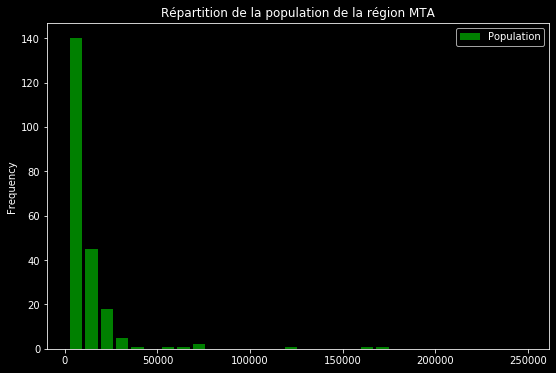

In [22]:
plt.style.use('dark_background')
dfc[['Population']].plot(kind='hist', bins=30, range=(2000,250000),figsize=(9,6),  rwidth=0.8, color='green', title='Répartition de la population de la région MTA')

<br> <font color='green'>    Noting that most communes have a population of less than 60,000, a clearer visualization would be : </font>

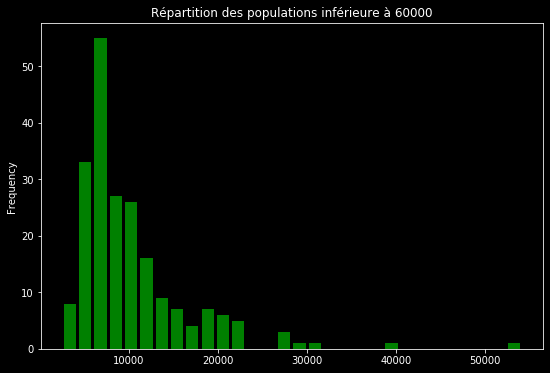

In [23]:
dfc[(dfc['Population'] < 60000)]['Population'].plot(kind='hist',figsize=(9,6), bins=30, rwidth=0.8, color='green', title='Répartition des populations inférieure à 60000')

2. Using plotly and cufflinks to interact with the visualisation of the population of each commune.

In [24]:
dfc.iplot(x='Nom_Commune' , y='Population', kind='scatter', theme='solar' , colorscale='greens', mode='markers', size=5 )

<b> Comments : </b>

The distribution of the population shows that most of the communes of the region have a population under 50 000. And extreme values of the population are the communes near to Marrakech. 

## Question 10

Graphical representation of the activity rate as a function of the illiteracy rate. Scatter plot is the appropriate choice.

1. with Matplotlib :

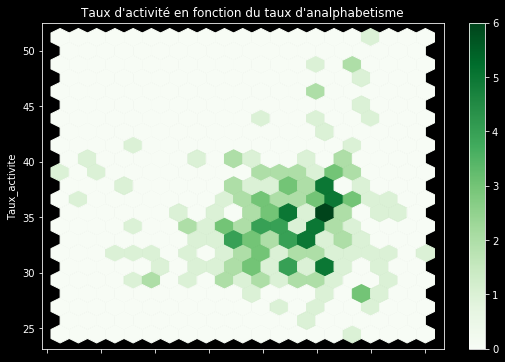

In [25]:
dfc.plot.hexbin(x='Taux_Analphabetisme',y='Taux_activite',gridsize=20, figsize=(9,6), title="Taux d'activité en fonction du taux d'analphabetisme", cmap='Greens')

2. With Seaborn : 

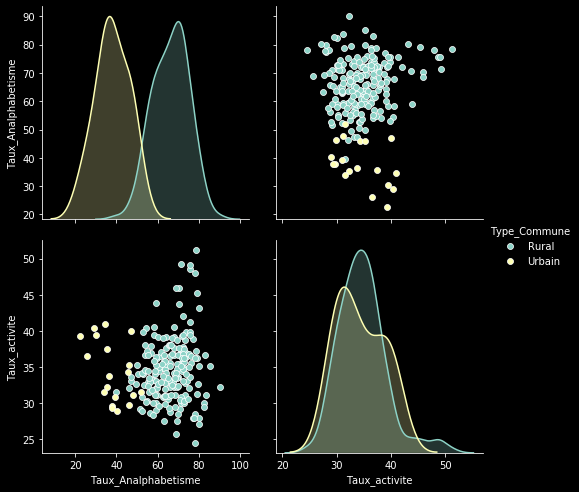

In [26]:
sns.pairplot(dfc[["Taux_Analphabetisme","Taux_activite","Type_Commune"]],hue='Type_Commune', height=3.5)

<b> Comments : </b>

We can see clearly the impact of the type of the commune in the activity rate as a function of the illeteracy rate. <br>
In urban areas : as the illeteracy rate get higher, the activity rate get lower. Because almost jobs require an educated cursus.<br>
In rural areas : the two parameters are independants, because in rural areas, the active population are not necessarly educated. 

## Question 11

Add in dfc a column representing the population density of the communes noted 'densite_pop'. 

In [27]:
dfc['densite_pop'] = (100*dfc['Population'] / dfc['Surface_ha'])      
dfc[['Nom_Commune', 'Population', 'Surface_ha', 'densite_pop']] .head()

,Nom_Commune,Population,Surface_ha,densite_pop
0,ABADOU,9905,9504.74,104.211162
1,ADAGHAS,3321,9266.43,35.839045
2,ADASSIL,7212,14560.61,49.530892
3,AFALLA ISSEN,7961,12295.32,64.748213
4,AGAFAY,11079,18889.36,58.652067


## Question 12

Write a function labeled 'codeProvince' to extract the province code from the municipality code.

In [28]:
def codeProvince(x) : 
    return(x[0:3])

Add the column 'Code_Province' in 'dfc' by applying the function 'codeProvince'.

In [29]:
dfc['Code_Province'] = dfc['Code_Commune'].apply(lambda x:codeProvince(x)) 

In [30]:
dfc['Code_Province'].unique() 
dfc.head()

,Nom_Commune,Code_Commune,Type_Commune,Surface_ha,Population,Pop_inf6_pc,Pop_615_pc,Pop_1560_pc,Pop_sup60_pc,Celebataire_pc,Marie_pc,Mrge_Autre_pc,Age_Moyen_1marriage,Taux_Analphabetisme,Taux_activite,densite_pop,Code_Province
0,ABADOU,041.03.01,Rural,9504.74,9905,13.6,24.1,53.7,8.6,31.8,61.1,7.1,25.6,58.3,40.6,104.211162,041
1,ADAGHAS,211.05.01,Rural,9266.43,3321,17.2,24.3,48.5,10.0,29.3,63.9,6.8,25.3,68.1,37.6,35.839045,211
2,ADASSIL,161.07.01,Rural,14560.61,7212,15.4,26.9,49.8,7.9,27.4,65.5,7.1,24.7,78.2,48.0,49.530892,161
3,AFALLA ISSEN,161.05.01,Rural,12295.32,7961,15.4,25.5,51.5,7.6,33.5,59.6,6.9,26.8,85.3,35.2,64.748213,161
4,AGAFAY,351.05.01,Rural,18889.36,11079,12.7,20.8,59.3,7.2,34.5,59.0,6.6,27.1,59.4,32.1,58.652067,351


## Question 13

Write a function labeled "nomProvince" to determine the name of the province from its province code. 

First, let's load a CSV file containing these two pieces of information (file : Code_Nom_Province.csv).

In [31]:
cn_prov = pd.read_csv('Code_Nom_Province.csv', dtype=str)
cn_prov.head()

,Code_Province,Nom_Province
0,041,AL HAOUZ
1,161,CHICHAOUA
2,191,KELAA SERAGHNA
3,211,ESSAOUIRA
4,351,MARRAKECH


The column 'Code_Province' in dfc is an object, therefore the parameter 'x' of the function 'nomProvince' must be operated as an object containing strings. 

In [32]:
def nomProvince(x) : 
  for i in range(5) :
    if x == cn_prov.loc[i]['Code_Province'] : 
        return(cn_prov.loc[i]['Nom_Province'])

Apply this function to "dfc" to add the "Nom_Province" column to the data.

In [33]:
dfc['Nom_Province'] = dfc['Code_Province'].apply(nomProvince)  

In [34]:
dfc[['Code_Commune','Nom_Commune','Code_Province', 'Nom_Province']].head(6)

,Code_Commune,Nom_Commune,Code_Province,Nom_Province
0,041.03.01,ABADOU,041,AL HAOUZ
1,211.05.01,ADAGHAS,211,ESSAOUIRA
2,161.07.01,ADASSIL,161,CHICHAOUA
3,161.05.01,AFALLA ISSEN,161,CHICHAOUA
4,351.05.01,AGAFAY,351,MARRAKECH
5,041.07.01,AGHBAR,041,AL HAOUZ


## Question 14

Set as index for "dfc" the two columns « Code_Province » and « Code_Commune ».

In [37]:
dfc.set_index(['Code_Province', 'Code_Commune'], inplace=True)
dfc.head()

Nom_Commune Type_Commune  Surface_ha  Population  \
Code_Province Code_Commune                                                      
041           041.03.01           ABADOU        Rural     9504.74        9905   
211           211.05.01          ADAGHAS        Rural     9266.43        3321   
161           161.07.01          ADASSIL        Rural    14560.61        7212   
              161.05.01     AFALLA ISSEN        Rural    12295.32        7961   
351           351.05.01           AGAFAY        Rural    18889.36       11079   

                            Pop_inf6_pc  Pop_615_pc  Pop_1560_pc  \
Code_Province Code_Commune                                         
041           041.03.01            13.6        24.1         53.7   
211           211.05.01            17.2        24.3         48.5   
161           161.07.01            15.4        26.9         49.8   
              161.05.01            15.4        25.5         51.5   
351           351.05.01            12.7        20.8         59.3   

                            Pop_sup60_pc  Celebataire_pc  Marie_pc  \
Code_Province Code_Commune                                           
041           041.03.01              8.6            31.8      61.1   
211           211.05.01             10.0            29.3      63.9   
161           161.07.01              7.9            27.4      65.5   
              161.05.01              7.6            33.5      59.6   
351           351.05.01              7.2            34.5      59.0   

                            Mrge_Autre_pc  Age_Moyen_1marriage  \
Code_Province Code_Commune                                       
041           041.03.01               7.1                 25.6   
211           211.05.01               6.8                 25.3   
161           161.07.01               7.1                 24.7   
              161.05.01               6.9                 26.8   
351           351.05.01               6.6                 27.1   

                            Taux_Analphabetisme  Taux_activite  densite_pop  \
Code_Province Code_Commune                                                    
041           041.03.01                    58.3           40.6   104.211162   
211           211.05.01                    68.1           37.6    35.839045   
161           161.07.01                    78.2           48.0    49.530892   
              161.05.01                    85.3           35.2    64.748213   
351           351.05.01                    59.4           32.1    58.652067   

                           Nom_Province  
Code_Province Code_Commune               
041           041.03.01        AL HAOUZ  
211           211.05.01       ESSAOUIRA  
161           161.07.01       CHICHAOUA  
              161.05.01       CHICHAOUA  
351           351.05.01       MARRAKECH

In [38]:
dfc.index.names

FrozenList(['Code_Province', 'Code_Commune'])

Sort 'dfc' according to the new indexes. 

In [39]:
dfc.sort_index(inplace=True)

## Question 15

Export the DataFrame 'dfc' to an Excel file marked 'dfc_ElMissaoui.xlsx'.

In [40]:
dfc.to_excel('dfc_ElMissaoui.xlsx', sheet_name='RGPH2004')

## Question 16

Calculate the number of rural and urban communes in each province

In [41]:
dfc.groupby('Nom_Province')['Type_Commune'].value_counts().to_frame()

Type_Commune
Nom_Province   Type_Commune              
AL HAOUZ       Rural                   38
               Urbain                   1
CHICHAOUA      Rural                   33
               Urbain                   2
ESSAOUIRA      Rural                   52
               Urbain                   5
KELAA SERAGHNA Rural                   62
               Urbain                   5
MARRAKECH      Rural                   13
               Urbain                   6

## Question 17

Calculate the activity rate in each province. (Activity rate  = population active/total population)

In [42]:
dfc['population_active']= round((dfc['Population']*dfc['Taux_activite'])/100) 

In [43]:
((dfc.groupby('Nom_Province')['population_active'].sum())/(dfc.groupby('Nom_Province')['Population'].sum())*100).to_frame()

,0
Nom_Province,
AL HAOUZ,35.883458
CHICHAOUA,33.771612
ESSAOUIRA,36.055438
KELAA SERAGHNA,33.307009
MARRAKECH,37.709079


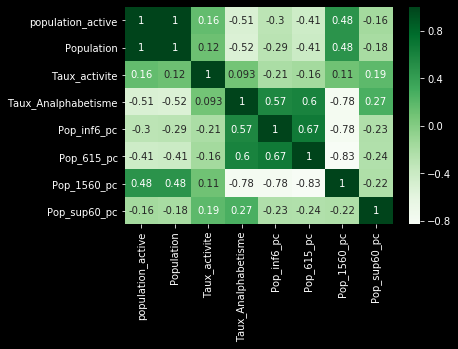

In [44]:
sns.heatmap(dfc[['population_active', 'Population', 'Taux_activite', 'Taux_Analphabetisme', 'Pop_inf6_pc', 'Pop_615_pc', 'Pop_1560_pc','Pop_sup60_pc']].corr(), cmap='Greens', annot=True)

## Question 18

Generate a new DataFrame of the provinces marked 'dfp'. 

In [45]:
dfp = dfc.groupby(['Nom_Province', 'Code_Province'])['Surface_ha','Population', 'population_active'].sum()

In [46]:
dfp

,,Surface_ha,Population,population_active
Nom_Province,Code_Province,,,
AL HAOUZ,041,606789.04,483741,173583.0
CHICHAOUA,161,712462.08,339510,114658.0
ESSAOUIRA,211,658513.04,452040,162985.0
KELAA SERAGHNA,191,970649.37,749632,249680.0
MARRAKECH,351,258953.71,1063415,401004.0


With this new DataFrame 'dfp', we can visualize the distribution of the population of the Marrakech Tansift Alhaouz region.

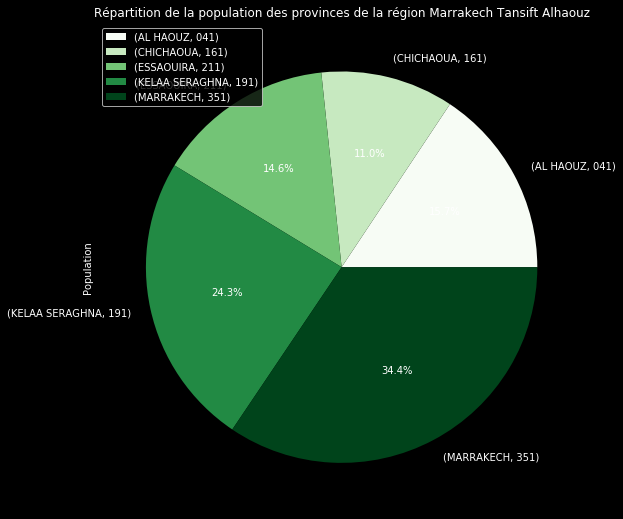

In [47]:
dfp.plot(y='Population', kind='pie', colormap='Greens', use_index=True, stacked=True, figsize=(9,9), autopct='%1.1f%%', title='Répartition de la population des provinces de la région Marrakech Tansift Alhaouz')

Using interactive plotting : 

In [48]:
fig = px.pie(dfp, values='Population', names=['AL HAOUZ', 'CHICHAOUA', 'ESSAOUIRA', 'KELAA SERAGHNA', 'MARRAKECH'], title='Population of each province in the Marrakech - Tansift Region.', color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig.show()

## Question 19

Calculate the illiteracy and activity rate in each province and add them to 'dfp'.

In [49]:
dfc['Population_analphabete']= (dfc['Population']*dfc['Taux_Analphabetisme'])/100

In [50]:
dfp['Taux_analphabetisme']= round(((dfc.groupby('Nom_Province')['Population_analphabete'].sum())/dfp['Population'])*100,2)

In [51]:
dfp['Taux_Activite'] = round((dfp['population_active']/dfp['Population'])*100,2)

In [52]:
dfp

,,Surface_ha,Population,population_active,Taux_analphabetisme,Taux_Activite
Nom_Province,Code_Province,,,,,
AL HAOUZ,041,606789.04,483741,173583.0,62.54,35.88
CHICHAOUA,161,712462.08,339510,114658.0,67.87,33.77
ESSAOUIRA,211,658513.04,452040,162985.0,62.86,36.06
KELAA SERAGHNA,191,970649.37,749632,249680.0,56.66,33.31
MARRAKECH,351,258953.71,1063415,401004.0,36.12,37.71


## Question 20

Calculate the percentages of population distribution by age group (Pop_inf6_pc,
Pop_615_pc, Pop_1560_pc, Pop_sup60_pc) in each province and add them to 'dfp'.

In [53]:
dfc['Population_inf6']= (dfc['Population']*dfc['Pop_inf6_pc'])/100

In [54]:
dfp['Taux_pop_inf6']= round(((dfc.groupby('Nom_Province')['Population_inf6'].sum())/(dfp['Population']))*100,2)

In [55]:
dfc['Population_615']= (dfc['Population']*dfc['Pop_615_pc'])/100

In [56]:
dfp['Taux_pop_6_15']= round(((dfc.groupby('Nom_Province')['Population_615'].sum())/dfp['Population'])*100,2)

In [57]:
dfc['Population_1560']= (dfc['Population']*dfc['Pop_1560_pc'])/100

In [58]:
dfp['Taux_pop_15_60']= round(((dfc.groupby('Nom_Province')['Population_1560'].sum())/dfp['Population'])*100,2)

In [59]:
dfc['Population_sup60']= (dfc['Population']*dfc['Pop_sup60_pc'])/100

In [60]:
dfp['Taux_pop_sup60']= round(((dfc.groupby('Nom_Province')['Population_sup60'].sum())/dfp['Population'])*100,2)

In [61]:
dfp

,,Surface_ha,Population,population_active,Taux_analphabetisme,Taux_Activite,Taux_pop_inf6,Taux_pop_6_15,Taux_pop_15_60,Taux_pop_sup60
Nom_Province,Code_Province,,,,,,,,,
AL HAOUZ,041,606789.04,483741,173583.0,62.54,35.88,12.90,22.42,56.32,8.34
CHICHAOUA,161,712462.08,339510,114658.0,67.87,33.77,14.19,23.45,53.84,8.54
ESSAOUIRA,211,658513.04,452040,162985.0,62.86,36.06,13.20,21.06,55.65,10.10
KELAA SERAGHNA,191,970649.37,749632,249680.0,56.66,33.31,12.90,22.10,57.37,7.63
MARRAKECH,351,258953.71,1063415,401004.0,36.12,37.71,11.23,17.54,63.31,7.95


## Question 21

Export the DataFrame " dfp " to an Excel file marked " dfp_ElMissaoui.xlsx ".

In [62]:
dfp.to_excel('dfp_ElMissaoui.xlsx', sheet_name='RG_PROVINCES')

## Question 22

Representation, on the same graph, of the population and active population of the provinces.

In [63]:
dfp.reset_index(inplace=True)

In [64]:
dfp = dfp.set_index('Nom_Province')

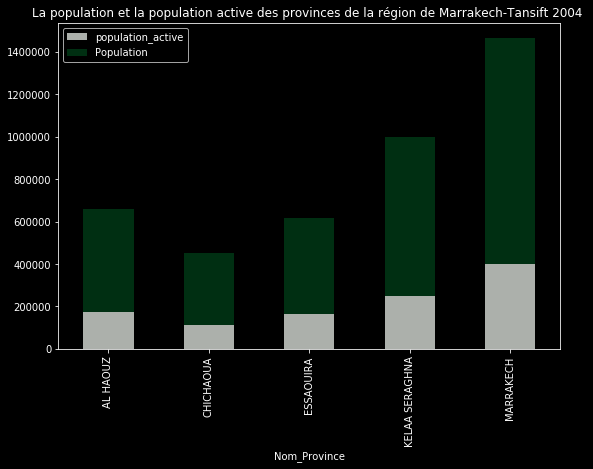

In [65]:
dfp[['population_active','Population']].plot(kind='bar', title='La population et la population active des provinces de la région de Marrakech-Tansift 2004 ', colormap='Greens', use_index=True, stacked=True, alpha=0.7, figsize=(9,6))


With Plotly and Cufflinks : 

In [66]:
dfp[['population_active','Population']].iplot(kind='bar',title='La population et la population active des provinces de la région de Marrakech-Tansift 2004 ', barmode='overlay', orientation='h', colorscale='GnBu', theme='solar' )

Commentaire : 

The distribution of the population in the region is slightly the same as the distribution of the active population, it means the variance of the activity rate of the region is minimal. 
The province of Marrakech has the highest population and population active, and the province of Chichaoua has the lowest population and population active. 

## Question 23

Show on the same graph the activity rate and the illiteracy rate for each province.

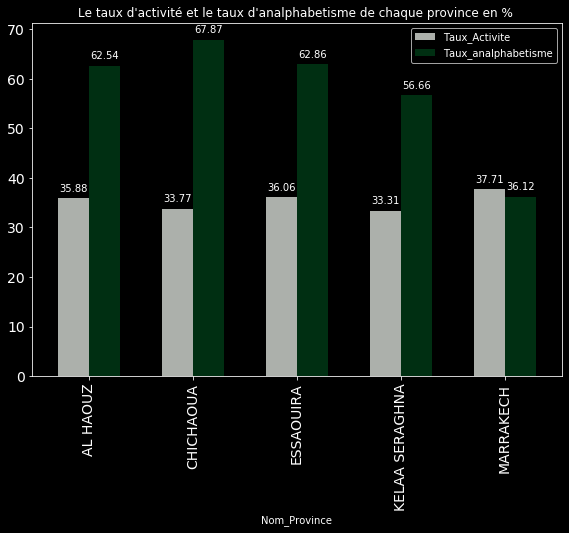

In [67]:
splt = dfp[['Taux_Activite','Taux_analphabetisme']].plot(kind='bar', colormap='Greens', use_index=True, stacked=False, alpha=0.7, fontsize=14, grid=False, width=0.6, title=("Le taux d'activité et le taux d'analphabetisme de chaque province en % "), figsize=(9.5,6.5))
for p in splt.patches: 
    splt.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

<b> Comments : </b>

- The distribution of the activity rate is slightly the same in the five provinces of the region. Thus, the share of working people is high in Marrakech province (37.71%), and lowest in Kelaa Seraghna province (33.31%). We can see that it's not necessary the province with the lowest active population has the lowest activity rate.
- Thus, The distribution of the illeteracy rate is slightly different in the five provinces of the region. The illeteracy rate is high in Chichaoua province (67.87%), and lowest in Marrakech province (36.12%).
- Marrakech is the only province that has an activity rate higher than illetracy rate. We can deduce that the province of Marrakech is economically and educationally powerfull. 
- Essaouira is the second high illeteracy rate (62.86%) province, but also the second high activty rate (36.06%). We can deduce that the activity in the province is provided by undeucated people and sectors (like tourism, real-estate..) 

## Question 24

Show on the same graph the percentages of population distribution by age group.

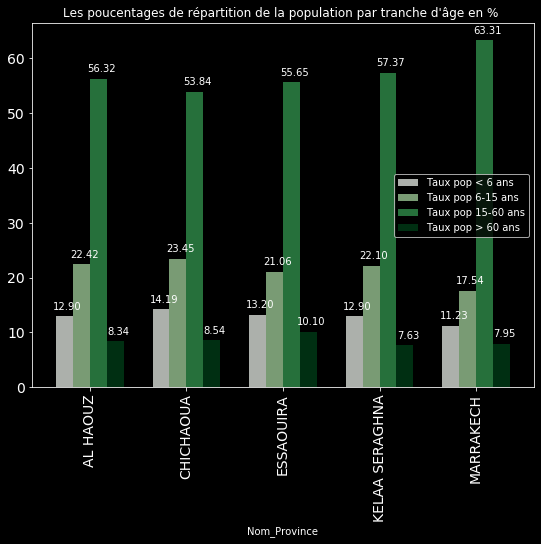

In [68]:
popage = dfp[['Taux_pop_inf6','Taux_pop_6_15','Taux_pop_15_60', 'Taux_pop_sup60']].plot( kind='bar', width=0.7, colormap='Greens', use_index=True, stacked=False, alpha=0.7, fontsize=14, grid=False, title=("Les poucentages de répartition de la population par tranche d'âge en % "), figsize=(9,6.7))

for p in popage.patches: 
    popage.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (3, 10), textcoords = 'offset points')
popage.legend(['Taux pop < 6 ans', 'Taux pop 6-15 ans', 'Taux pop 15-60 ans','Taux pop > 60 ans'], loc=5)


With Plotly : 

In [69]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [70]:

labels=['Inférieure à 6ans','Entre 6 et 15ans','Entre 15 et 60ans', 'Supérieure à 60ans']

# Create 5 subplots, one for each province.

fig = make_subplots(rows=1, cols=2 , specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values= (dfp.iloc[0][['Taux_pop_inf6','Taux_pop_6_15','Taux_pop_15_60', 'Taux_pop_sup60']].values.tolist()) , name=dfp.index[0]),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values = (dfp.iloc[1][['Taux_pop_inf6','Taux_pop_6_15','Taux_pop_15_60', 'Taux_pop_sup60']].values.tolist()) ,  name=dfp.index[1]),
              1, 2)




figd = make_subplots(rows=1, cols=2 , specs=[[{'type':'domain'}, {'type':'domain'}]])
figd.add_trace(go.Pie(labels=labels, values = (dfp.iloc[2][['Taux_pop_inf6','Taux_pop_6_15','Taux_pop_15_60', 'Taux_pop_sup60']].values.tolist()) , name=dfp.index[2]),
              1, 1)
figd.add_trace(go.Pie(labels=labels, values = (dfp.iloc[3][['Taux_pop_inf6','Taux_pop_6_15','Taux_pop_15_60', 'Taux_pop_sup60']].values.tolist()) , name=dfp.index[3]),
              1, 2)




figt = make_subplots(rows=1, cols=2 , specs=[[{'type':'domain'}, {'type':'domain'}]])
figt.add_trace(go.Pie(labels=labels, values = (dfp.iloc[4][['Taux_pop_inf6','Taux_pop_6_15','Taux_pop_15_60', 'Taux_pop_sup60']].values.tolist()) , name=dfp.index[4]),
              1, 1)


# Create the donut pies.


fig.update_traces(hole=.4, hoverinfo="label+percent+name")
figd.update_traces(hole=.4, hoverinfo="label+percent+name")
figt.update_traces(hole=.4, hoverinfo="label+percent+name")




# Remove the static legend.


fig.update(layout_showlegend=False)
figd.update(layout_showlegend=False)
figt.update(layout_showlegend=False)




# Add annotations in the center of the donut pies.

fig.update_layout(
    title_text="La répartition de la population par tranche d'âge en %",
    annotations=[dict(text=dfp.index[0], x=0.16, y=0.53, font_size=20, showarrow=False),
                 dict(text=dfp.index[1], x=0.85, y=0.53, font_size=20, showarrow=False)])

figd.update_layout( annotations= [dict(text=dfp.index[2], x=0.15, y=0.5, font_size=20, showarrow=False),
                dict(text=dfp.index[3], x=0.87, y=0.5, font_size=15, showarrow=False)])


figt.update_layout( annotations= [dict(text=dfp.index[4], x=0.14, y=0.5, font_size=20, showarrow=False)])



fig.show()
figd.show()
figt.show()


<b> Comments </b>

- The population of the province of Chichaoua is a young population, it has the highest rate of the population under 15 years of age (37.6%), and remember, the highest illeteracy rate (67.87%).

- Marrakech is the province that has the lowest rate of population under 15 years of age (28.7%), the second lowest rate of population aged 60 and over and, as we saw before, the highest activity rate and the lowest illeteracy rate. This can only be the effect of migration for work, study or other reasons.

- More than half of the population in all of the provinces of the region, was aged between 15 and 60 years (max 63.6% in Marrakech and min 53.8% in Chichaoua). The proportion of the population aged 60 and over is approximately 8% in all the provinces, beside Essaouira with 10%.


In [71]:
dfc.drop(['Population_analphabete', 'Population_inf6', 'Population_615', 'Population_1560', 'Population_sup60'], axis=1, inplace=True)

In [69]:
dfc.head()

Nom_Commune Type_Commune  Surface_ha  \
Code_Province Code_Commune                                               
041           041.01.01             AIT OURIR       Urbain     1077.92   
              041.03.01                ABADOU        Rural     9504.74   
              041.03.03             AIT AADEL        Rural    11318.58   
              041.03.05             AIT FASKA        Rural    11046.10   
              041.03.07     AIT HKIM AIT IZID        Rural    11013.38   

                            Population  Pop_inf6_pc  Pop_615_pc  Pop_1560_pc  \
Code_Province Code_Commune                                                     
041           041.01.01          19864         11.5        20.2         61.4   
              041.03.01           9905         13.6        24.1         53.7   
              041.03.03           6967         17.2        25.1         51.1   
              041.03.05          19228         10.9        20.1         60.3   
              041.03.07           8112         17.3        25.4         51.0   

                            Pop_sup60_pc  Celebataire_pc  Marie_pc  \
Code_Province Code_Commune                                           
041           041.01.01              6.9            38.5      54.6   
              041.03.01              8.6            31.8      61.1   
              041.03.03              6.6            28.8      64.9   
              041.03.05              8.6            39.3      53.4   
              041.03.07              6.3            29.4      64.8   

                            Mrge_Autre_pc  Age_Moyen_1marriage  \
Code_Province Code_Commune                                       
041           041.01.01               7.0                 28.4   
              041.03.01               7.1                 25.6   
              041.03.03               6.4                 23.4   
              041.03.05               7.3                 28.3   
              041.03.07               5.8                 23.2   

                            Taux_Analphabetisme  Taux_activite  densite_pop  \
Code_Province Code_Commune                                                    
041           041.01.01                    37.7           29.6  1842.808372   
              041.03.01                    58.3           40.6   104.211162   
              041.03.03                    69.9           33.7    61.553658   
              041.03.05                    58.7           34.0   174.070486   
              041.03.07                    71.5           30.1    73.655862   

                           Nom_Province  population_active  
Code_Province Code_Commune                                  
041           041.01.01        AL HAOUZ             5880.0  
              041.03.01        AL HAOUZ             4021.0  
              041.03.03        AL HAOUZ             2348.0  
              041.03.05        AL HAOUZ             6538.0  
              041.03.07        AL HAOUZ             2442.0

# <br> <font color='green'> - Partie 2 -   </font>                    

## Question 25

Set up an automation process using python and its libraries to extract the demographic characteristics in 2014 for each of the communes represented in the DataFrame "dfc" from the website of the Haut- Commissariat au plan (http://rgphentableaux.hcp.ma/). 

Data to be extracted : 

- Population 
- Age moyen au premier mariage
- Taux d'activité
- Taux d'analphabetisme.

#### Brief Introduction to Web Scraping 

Web scraping, also called web data mining or web harvesting, is the process of constructing an agent which can extract, parse, download and organize useful information from the web.
To do this, Python offers many libraries, the popular of them are :  <br>
Beautiful Soup : for static web scraping <br>
Selenium : for dynamic web scraping and automation.<br>
Requests : for dynamic web scraping.<br> 
Scrapy : caching web pages and parallelism.<br>

#### Our case : 

In our case, we want to extract data automatically in a dynamic website which has data behind buttons options created via JavaScript. So Selemium is the appropriate choice for interacting with web pages and with Core Javascript featured website; Requests also is a good choice for dealing with json dynamic websites and faster than selenium, but it doesnt automate the browser as asked in the question, Request method is procedural. Beautiful Soup is when it comes to extract information from just a single web page in a run, or a low-level complex project.

Path : 

1. Install & Import Selenium & Requests
2. Collect all new commune's code and name of the communes with selenium and charge them in dfc2
3. Get the data : 
       - Method 1 : Procedural method using 'Requests' 
       - Method 2 : Automation process using 'Selenium'

### 1. Install & Import Selenium & Requests

Open the terminal, install selenium package and download drivers for the browser we will use.<br>
pip install selenium <br>
pip install requests <br>
install webdriver for chrome <br>

Import selenium

In [70]:
from selenium import webdriver ##to use the browser (chrome in this case)
from selenium.webdriver.common.keys import Keys ## Keys for sending text to the search box in the website
import time ##time is used to stop the browser for a determined time

In [71]:
dfc2 = dfc.sort_values(by='Nom_Commune').reset_index()

In [72]:
dfc2.head()

,Code_Province,Code_Commune,Nom_Commune,Type_Commune,Surface_ha,Population,Pop_inf6_pc,Pop_615_pc,Pop_1560_pc,Pop_sup60_pc,Celebataire_pc,Marie_pc,Mrge_Autre_pc,Age_Moyen_1marriage,Taux_Analphabetisme,Taux_activite,densite_pop,Nom_Province,population_active
0,041,041.03.01,ABADOU,Rural,9504.74,9905,13.6,24.1,53.7,8.6,31.8,61.1,7.1,25.6,58.3,40.6,104.211162,AL HAOUZ,4021.0
1,211,211.05.01,ADAGHAS,Rural,9266.43,3321,17.2,24.3,48.5,10.0,29.3,63.9,6.8,25.3,68.1,37.6,35.839045,ESSAOUIRA,1249.0
2,161,161.07.01,ADASSIL,Rural,14560.61,7212,15.4,26.9,49.8,7.9,27.4,65.5,7.1,24.7,78.2,48.0,49.530892,CHICHAOUA,3462.0
3,161,161.05.01,AFALLA ISSEN,Rural,12295.32,7961,15.4,25.5,51.5,7.6,33.5,59.6,6.9,26.8,85.3,35.2,64.748213,CHICHAOUA,2802.0
4,351,351.05.01,AGAFAY,Rural,18889.36,11079,12.7,20.8,59.3,7.2,34.5,59.0,6.6,27.1,59.4,32.1,58.652067,MARRAKECH,3556.0


### 2. Collect new commune's code and name of each commune in dfc2 with Selenium 

get chrome browser driver from bin path

In [70]:
browser = webdriver.Chrome()

Get the website

In [71]:
browser.get("http://rgphentableaux.hcp.ma/Default1/")

- When inspecting the page source code of the website, the names of all the communes are listed as options (tag) in 'COMMUNELIST' with their relative code as value of the option. We can get their names (text) and commune's code (value) in a dataframe 'df' and compare them to what we have in 'dfc2' and then add a new columns in 'dfc2' with the name and the new commune's code in the website database.

In [72]:
element = browser.find_element_by_name('COMMUNELIST')

In [73]:
all_options = element.find_elements_by_tag_name("option")

In [74]:
len(all_options)

1687

In [75]:
##  First, let's create a random dataframe with 2 string columns and 1687 rows.
df = pd.DataFrame(np.random.randint(0,100,size=(1687, 2)), columns=list('CN'))
df['C'] =  df['C'].astype(str) 
df['N'] =  df['N'].astype(str) 

In [76]:
##  Second, charge the new commune's code and names in df
for i in range(0,1687) : 
    df.loc[i,'C']  = all_options[i].get_attribute('value') ## code 
    df.loc[i,'N']  = all_options[i].get_attribute('text')  ## name 
    
df.head(10)

,A,B
0,001.01.01.,Agadir
1,001.05.01.,Amskroud
2,001.05.09.,Drargua
3,001.05.09.3.,Drargua (Centre)
4,001.05.11.,Idmine
5,001.07.03.,Aourir
6,001.07.03.3.,Aourir (Centre)
7,001.07.05.,Aqesri
8,001.07.07.,Aziar
9,001.07.13.,Imouzzer


In [77]:
##remove the last dot in each of the commune's code (alternative : use lambda directly in apply)
def coup(x):
    return (x[:-1])

In [78]:
df['C'] = df['C'].apply(coup)   

In [79]:
##Initiate the columns in dfc2 randomly 
dfc2['Nom_Commune_Site'] = dfc2['Nom_Commune'] 
dfc2['Code_Commune_2014'] = dfc2['Code_Commune']  
## 3 Special cases to modify manually : 'AIT HKIM-AIT YZID', 'SKHOUR REHAMNA', 'SIDI GHANEM'
dfc2.loc[17, 'Nom_Commune'] = 'AIT HKIM-AIT YZID'
dfc2.loc[178, 'Nom_Commune'] = 'SKHOUR REHAMNA'


In [80]:
##get the new commune's code. 
for i in range(0,217) : 
    for j in range (0,1687) :  ##casefold() : anti-case-sensitive
        if (dfc2.loc[i, 'Nom_Commune'].casefold() == df.loc[j, 'N'].casefold()) : 
            dfc2.loc[i, 'Code_Commune_2014'] = df.loc[j, 'C'] 

##Sidi Ghanem is a special case, we have to modify it manually            
dfc2.loc[165, 'Code_Commune_2014'] = '211.05.31'
dfc2.loc[166, 'Code_Commune_2014'] = '161.05.15'

##then get the commune's name in the website.
for i in range(0,217) : 
    for j in range (0,1687) : 
        if (dfc2.loc[i, 'Code_Commune_2014'] == df.loc[j, 'C']) : 
            dfc2.loc[i, 'Nom_Commune_Site'] = df.loc[j, 'N'] 

 

In [81]:
dfc2[['Nom_Commune','Nom_Commune','Population','Nom_Commune_Site','Code_Commune_2014','Code_Commune']].head(20)

,Nom_Commune,Nom_Commune,Population,Nom_Commune_Site,Code_Commune_2014,Code_Commune
0,ABADOU,ABADOU,9905,Abadou,041.11.01,041.03.01
1,ADAGHAS,ADAGHAS,3321,Adaghas,211.05.01,211.05.01
2,ADASSIL,ADASSIL,7212,Adassil,161.07.01,161.07.01
3,AFALLA ISSEN,AFALLA ISSEN,7961,Afalla Issen,161.05.01,161.05.01
4,AGAFAY,AGAFAY,11079,Agafay,351.05.01,351.05.01
5,AGHBAR,AGHBAR,4608,Aghbar,041.07.01,041.07.01
6,AGLIF,AGLIF,8934,Aglif,211.05.03,211.05.03
7,AGUERD,AGUERD,4917,Aguerd,211.05.05,211.05.05
8,AHDIL,AHDIL,11764,Ahdil,161.03.01,161.03.01
9,AIN TAZITOUNTE,AIN TAZITOUNTE,5947,Ain Tazitounte,161.05.03,161.05.03


### 3. Get the data : 


#### Method 1 : Requests 

When using Requests, we inspect the network of the website, not the html page source code. In order to know what url we will request and which of the arguments will help, we inspect the website and we launch manually a request and we get it's url, header, preview, response...  <br>
Inspect and click network : 
![Network1](1.png)<br>
Launch a random request : (e.g. 'Agadir') <br>
![Network2](2.png)<br>
Click on the request generated in network to get the url headers which used so both the client and the server know how to interpret the data and identify the reference url.<br> 
![Network3](3.png)<br>
Click on 'Preview' to see the data in json format<br>
![Network4](4.png)<br>





In [82]:
import requests

In [83]:
dfc2['Population_2014'] = dfc2['Population']
dfc2['Age_Mariage_2014'] = dfc2['Population']
dfc2['Taux_Activite_2014'] = dfc2['Population']
dfc2['Taux_Analphabetisme_2014'] = dfc2['Population']

In [84]:
for i in dfc2['Code_Commune_2014'] :

    url = f"http://rgphentableaux.hcp.ma/Default1/getDATA/?type=Commune&CGEO={i}.&them=2" ##2 For demographic data
    result = requests.get(url, headers={'Referer': 'http://rgphentableaux.hcp.ma/Default1/'})
    dfc2.loc[dfc2['Code_Commune_2014'] == i , 'Population_2014'] = result.json()[0]['DATA2014']
    dfc2.loc[dfc2['Code_Commune_2014'] == i , 'Age_Mariage_2014'] = result.json()[75]['DATA2014']
    url = f"http://rgphentableaux.hcp.ma/Default1/getDATA/?type=Commune&CGEO={i}.&them=4" ##4 For Illiteracy rate
    result = requests.get(url, headers={'Referer': 'http://rgphentableaux.hcp.ma/Default1/'})
    dfc2.loc[dfc2['Code_Commune_2014'] == i , 'Taux_Analphabetisme_2014'] = result.json()[0]['DATA2014']
    url = f"http://rgphentableaux.hcp.ma/Default1/getDATA/?type=Commune&CGEO={i}.&them=6" ##6 For Activity rate
    result = requests.get(url, headers={'Referer': 'http://rgphentableaux.hcp.ma/Default1/'})
    dfc2.loc[dfc2['Code_Commune_2014'] == i , 'Taux_Activite_2014'] = result.json()[6]['DATA2014']

In [85]:
dfc2.head(10)

,Code_Province,Code_Commune,Nom_Commune,Type_Commune,Surface_ha,Population,Pop_inf6_pc,Pop_615_pc,Pop_1560_pc,Pop_sup60_pc,...,Taux_activite,densite_pop,Nom_Province,population_active,Nom_Commune_Site,Code_Commune_2014,Population_2014,Age_Mariage_2014,Taux_Activite_2014,Taux_Analphabetisme_2014
0,041,041.03.01,ABADOU,Rural,9504.74,9905,13.6,24.1,53.7,8.6,...,40.6,104.211162,AL HAOUZ,4021.0,Abadou,041.11.01,10602,26.8,48.8,44.2
1,211,211.05.01,ADAGHAS,Rural,9266.43,3321,17.2,24.3,48.5,10.0,...,37.6,35.839045,ESSAOUIRA,1249.0,Adaghas,211.05.01,2811,28.3,40.2,63
2,161,161.07.01,ADASSIL,Rural,14560.61,7212,15.4,26.9,49.8,7.9,...,48.0,49.530892,CHICHAOUA,3462.0,Adassil,161.07.01,7454,25.8,51.6,62.6
3,161,161.05.01,AFALLA ISSEN,Rural,12295.32,7961,15.4,25.5,51.5,7.6,...,35.2,64.748213,CHICHAOUA,2802.0,Afalla Issen,161.05.01,8129,27.3,38.1,60.6
4,351,351.05.01,AGAFAY,Rural,18889.36,11079,12.7,20.8,59.3,7.2,...,32.1,58.652067,MARRAKECH,3556.0,Agafay,351.05.01,15452,26.1,43.7,43.9
5,041,041.07.01,AGHBAR,Rural,24085.94,4608,18.4,25.8,48.4,7.4,...,32.3,19.131493,AL HAOUZ,1488.0,Aghbar,041.07.01,5182,23.1,71.6,55
6,211,211.05.03,AGLIF,Rural,19199.77,8934,15.7,25.3,49.0,9.9,...,28.0,46.531807,ESSAOUIRA,2502.0,Aglif,211.05.03,8028,25.8,34.8,60.8
7,211,211.05.05,AGUERD,Rural,8897.58,4917,12.7,20.2,55.2,11.9,...,42.1,55.262217,ESSAOUIRA,2070.0,Aguerd,211.05.05,5378,26.9,43.3,54.4
8,161,161.03.01,AHDIL,Rural,45308.68,11764,15.3,25.3,51.9,7.4,...,36.4,25.964120,CHICHAOUA,4282.0,Ahdil,161.03.01,11438,27.4,45.9,54
9,161,161.05.03,AIN TAZITOUNTE,Rural,9943.05,5947,15.0,24.6,51.1,9.3,...,31.2,59.810621,CHICHAOUA,1855.0,Ain Tazitounte,161.05.03,5509,27.2,40.8,56.3


In [89]:
dfc2.tail(60)

,Code_Province,Code_Commune,Nom_Commune,Type_Commune,Surface_ha,Population,Pop_inf6_pc,Pop_615_pc,Pop_1560_pc,Pop_sup60_pc,...,Taux_activite,densite_pop,Nom_Province,population_active,Nom_Commune_Site,Code_Commune_2014,Population_2014,Age_Mariage_2014,Taux_Activite_2014,Taux_Analphabetisme_2014
157,041,041.05.17,SIDI BADHAJ,Rural,13341.68,6485,10.8,20.9,56.5,11.8,...,32.4,48.607072,AL HAOUZ,2101.0,Sidi Badhaj,041.05.17,5391,27.5,43.6,41.6
158,191,191.09.17,SIDI BOU OTHMANE,Rural,44610.07,17492,13.3,20.7,57.9,8.1,...,39.0,39.210878,KELAA SERAGHNA,6822.0,Sidi Bou Othmane,427.01.17,9181,26.7,45.6,32.6
159,191,191.09.15,SIDI BOUBKER,Rural,21667.14,6398,12.0,21.5,57.2,9.3,...,30.3,29.528586,KELAA SERAGHNA,1939.0,Sidi Boubker,427.09.15,6145,25.7,44.6,52
160,211,211.03.39,SIDI BOULAALAM,Rural,6899.67,7880,15.3,23.4,51.0,10.3,...,30.2,114.208361,ESSAOUIRA,2380.0,Sidi Boulaalam,211.03.39,8142,24.8,51,56
161,161,161.03.13,SIDI BOUZID ARRAGRAGUI,Rural,7484.84,9348,12.5,19.7,59.0,8.8,...,33.1,124.892449,CHICHAOUA,3094.0,Sidi Bouzid Arragragui,161.03.13,8935,27.4,43.9,45.4
162,191,191.03.35,SIDI EL HATTAB,Rural,21008.24,8183,14.3,22.6,55.4,7.6,...,33.7,38.951383,KELAA SERAGHNA,2758.0,Sidi El Hattab,191.03.35,9421,24.4,48.7,53.3
163,211,211.05.29,SIDI EL JAZOULI,Rural,14832.10,7360,12.4,21.9,54.6,11.2,...,30.6,49.622103,ESSAOUIRA,2252.0,Sidi El Jazouli,211.05.29,6462,26.7,41,62.4
164,191,191.07.19,SIDI GHANEM,Rural,31154.05,12159,13.5,24.6,53.2,8.7,...,48.6,39.028634,KELAA SERAGHNA,5909.0,Sidi Ghanem,427.07.19,10099,26.1,53.5,68
165,211,211.05.31,SIDI GHANEM,Rural,8595.16,5081,12.8,21.5,55.3,10.5,...,29.9,59.114665,ESSAOUIRA,1519.0,Sidi Ghanem,427.07.19,10099,26.1,53.5,68
166,161,161.05.15,SIDI GHANEM,Rural,14153.74,8665,16.1,22.8,52.8,8.3,...,35.2,61.220568,CHICHAOUA,3050.0,Sidi Ghanem,427.07.19,10099,26.1,53.5,68


In [ ]:
dfc2.to_excel('RGPH2004_2014_requests.xlsx')

#### Method 2 : Selenium 

Note : 'dfc2' in requests (method1) and 'dfc3' in selenium(method2). 

#### Identification of the pattern to automate : 

1. Get the website http://rgphentableaux.hcp.ma/Default1/
2. Click on 'démographie' button.
3. Click on 'communes' button.
4. Write the name of the commune.
5. Select it.
6. Click on 'Afficher' button to show the data.
7. get the data we want.
8. Click on 'Education' button.
9. Click on 'Afficher' button to retrieve the second information we want.
10. get the data we want.
11. Click on 'Activité' button.
12. Get the data we want.
13. Clear the search text box.


In [87]:
dfc3 = dfc2.drop(['Population_2014', 'Taux_Activite_2014','Taux_Analphabetisme_2014','Age_Mariage_2014'], axis=1)
dfc3['Population_2014'] = dfc3['Nom_Commune'] 
dfc3['Age_Mariage_2014'] = dfc3['Nom_Commune'] 
dfc3['Analphabetisme_2014'] = dfc3['Nom_Commune'] 
dfc3['Activite_2014'] = dfc3['Nom_Commune'] 

In this method, we inspect directly the code source. Selenium gives us many options to find the elements we want : 
    - by ID 
    - by class name
    - by tag name (div, input, li, td...)
    - by name
    - by xpath (div/div/li.input...) 

This return a web element selenium or a list of web element selenium, the functions allowed with, are : 
    - element.click()
    - element.send_keys()
    - element.text
    - element.size 
    ...

Note : time.sleep() allows us to stop the process for some seconds while the hidden source code charging. 8s is the optimal time for my connection's speed, I tried 10 s it didn't get the correct data. <br>
The automation code below last 25min-45min, it depends on connexion's speed, to extract 217 commune's characteristics, so I exported the results in a new dataframe 'RGPH2004_2014_selenium' in case you want to reduce the range of the loop for testing.

In [ ]:
browser = webdriver.Chrome()
browser.get("http://rgphentableaux.hcp.ma/Default1/")

In [227]:
for i in range(0,217) :
    
    ## the buttons's tag name is 'input', so we will find them all
    buttons = browser.find_elements_by_tag_name('input')
     ## 'démographie' button
    buttons[1].click()
     ## 'communes' button 
    buttons[10].click() 
    time.sleep(2)
     ## get the search text box which class name is 'default'  
    search= browser.find_elements_by_class_name('default')
    search[2].click()
    time.sleep(1)
     ## send each of the commune's website name in dfc
    search[2].send_keys(dfc3.loc[i, 'Nom_Commune_Site'])
     ## select the first result highlighted, after sending the text
    browser.find_element_by_xpath("//li[@class='active-result highlighted']").click()
    buttons = browser.find_elements_by_tag_name('input')
     ## for the result above, click on 'afficher'
    browser.execute_script("arguments[0].click();", buttons[14])
    time.sleep(8)
     ## data extraction 
    population = browser.find_elements_by_tag_name('td')
    dfc3.loc[i, 'Population_2014'] = population[3].text
    dfc3.loc[i, 'Age_Mariage_2014'] = population[106].text
    time.sleep(2)
    buttons[3].click()
    time.sleep(2)
    buttons = browser.find_elements_by_tag_name('input')
    browser.execute_script("arguments[0].click();", buttons[14])
    time.sleep(8)
    analphabetisme = browser.find_elements_by_tag_name('td')
    dfc3.loc[i, 'Analphabetisme_2014'] = analphabetisme[3].text
    time.sleep(2)
    buttons[5].click()
    browser.execute_script("arguments[0].click();", buttons[14])
    time.sleep(8)
    activite = browser.find_elements_by_tag_name('td')
    dfc3.loc[i, 'Activite_2014'] = activite[12].text
     ## clear the search text box
    close = browser.find_element_by_class_name('search-choice-close')
    time.sleep(2)
    close.click()

Note : If you reduced the range of the loop above, data,out of the range, will be lost. the code above is already saved in an excel file 'RGPH2004_2014_selenium' so you don't have to re-execute all of it. 

In [95]:
dfc3.to_excel('RGPH2004_2014_selenium.xlsx')

Charge the complete datafame exported by the code above ('RGPH2004_2014_selenium.xlsx') in case you reduced the loop and you don't have all the data about all the comunes. <br>
- Compare dfc3 and dfc2. 

In [132]:
dfc3 = pd.read_excel('RGPH2004_2014_selenium.xlsx')

In [144]:
dfc3.head()

,Unnamed: 0,Code_Province,Code_Commune,Nom_Commune,Type_Commune,Surface_ha,Population,Pop_inf6_pc,Pop_615_pc,Pop_1560_pc,...,population_active,Population_analphabete,Population_inf6,Population_615,Population_1560,Population_sup60,Population_2014,Age_Mariage_2014,Analphabetisme_2014,Activite_2014
0,0,41,041.03.01,ABADOU,Rural,9504.74,9905,13.6,24.1,53.7,...,4021,5774.615,1347.080,2387.105,5318.985,851.830,10 602,26.8,44.2,48.8
1,1,211,211.05.01,ADAGHAS,Rural,9266.43,3321,17.2,24.3,48.5,...,1249,2261.601,571.212,807.003,1610.685,332.100,2 811,28.3,63.0,40.2
2,2,161,161.07.01,ADASSIL,Rural,14560.61,7212,15.4,26.9,49.8,...,3462,5639.784,1110.648,1940.028,3591.576,569.748,7 454,25.8,62.6,51.6
3,3,161,161.05.01,AFALLA ISSEN,Rural,12295.32,7961,15.4,25.5,51.5,...,2802,6790.733,1225.994,2030.055,4099.915,605.036,8 129,27.3,60.6,38.1
4,4,351,351.05.01,AGAFAY,Rural,18889.36,11079,12.7,20.8,59.3,...,3556,6580.926,1407.033,2304.432,6569.847,797.688,15 452,26.1,43.9,43.7


In [94]:
dfc2.head()

,Code_Province,Code_Commune,Nom_Commune,Type_Commune,Surface_ha,Population,Pop_inf6_pc,Pop_615_pc,Pop_1560_pc,Pop_sup60_pc,...,Taux_activite,densite_pop,Nom_Province,population_active,Nom_Commune_Site,Code_Commune_2014,Population_2014,Age_Mariage_2014,Taux_Activite_2014,Taux_Analphabetisme_2014
0,041,041.03.01,ABADOU,Rural,9504.74,9905,13.6,24.1,53.7,8.6,...,40.6,104.211162,AL HAOUZ,4021.0,Abadou,041.11.01,10602,26.8,48.8,44.2
1,211,211.05.01,ADAGHAS,Rural,9266.43,3321,17.2,24.3,48.5,10.0,...,37.6,35.839045,ESSAOUIRA,1249.0,Adaghas,211.05.01,2811,28.3,40.2,63
2,161,161.07.01,ADASSIL,Rural,14560.61,7212,15.4,26.9,49.8,7.9,...,48.0,49.530892,CHICHAOUA,3462.0,Adassil,161.07.01,7454,25.8,51.6,62.6
3,161,161.05.01,AFALLA ISSEN,Rural,12295.32,7961,15.4,25.5,51.5,7.6,...,35.2,64.748213,CHICHAOUA,2802.0,Afalla Issen,161.05.01,8129,27.3,38.1,60.6
4,351,351.05.01,AGAFAY,Rural,18889.36,11079,12.7,20.8,59.3,7.2,...,32.1,58.652067,MARRAKECH,3556.0,Agafay,351.05.01,15452,26.1,43.7,43.9


## Question 26

Calculate the population growth rate of each commune ((population 2014- Population 2004) / population 2004)

First we should remove spaces in the column 'Population_2014' in order to convert it from string to integer. (e.g '10 345' --> '10345')

In [71]:
dfc2['Population_2014'] = dfc2['Population_2014'].str.replace(" ","")

In [96]:
dfc2['Population_2014'] = dfc2['Population_2014'].astype(int)

In [97]:
dfc2['Taux_Accroissement'] = round(((dfc2['Population_2014'] - dfc2['Population'])/dfc2['Population'])*100,2)

In [98]:
dfc2[['Nom_Commune','Taux_Accroissement']].head(10)

,Nom_Commune,Taux_Accroissement
0,ABADOU,7.04
1,ADAGHAS,-15.36
2,ADASSIL,3.36
3,AFALLA ISSEN,2.11
4,AGAFAY,39.47
5,AGHBAR,12.46
6,AGLIF,-10.14
7,AGUERD,9.38
8,AHDIL,-2.77
9,AIN TAZITOUNTE,-7.37


## Question 27

Calculate the population growth rate of each province.

In [104]:
dfp2 = round((((dfc2.groupby('Nom_Province')['Population_2014'].sum()) - (dfc2.groupby('Nom_Province')['Population'].sum()))/(dfc2.groupby('Nom_Province')['Population'].sum()))*100,2).to_frame('Taux_accroissement_provinces_%')

In [105]:
dfp2['Population_2004'] = dfp['Population']

In [106]:
dfp2['Population_2014'] = dfc2.groupby('Nom_Province')['Population_2014'].sum()

In [107]:
dfp2

,Taux_accroissement_provinces_%,Population_2004,Population_2014
Nom_Province,,,
AL HAOUZ,11.89,483741,541254
CHICHAOUA,9.06,339510,370267
ESSAOUIRA,0.55,452040,454514
KELAA SERAGHNA,11.52,749632,835976
MARRAKECH,24.41,1063415,1323005


## Question 28

Draw a graph highlighting the change in the population of each province between 2004 and 2014.

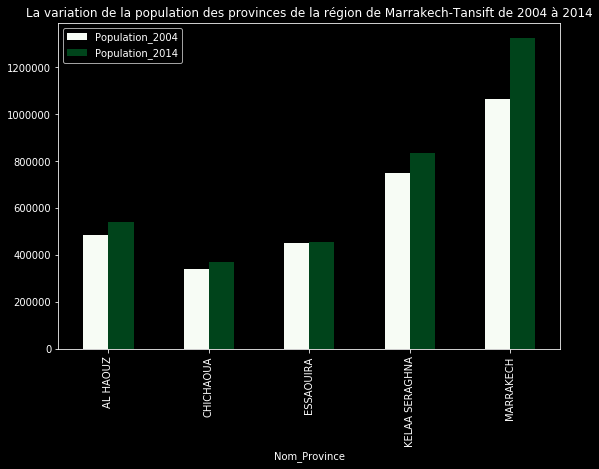

In [108]:
dfp2[['Population_2004', 'Population_2014']].plot(kind='bar', figsize=(9,6), colormap='Greens', title='La variation de la population des provinces de la région de Marrakech-Tansift de 2004 à 2014')


In [109]:
dfp2[['Population_2004', 'Population_2014']].iplot(kind='bar', title='La variation de la population des provinces de la région de Marrakech-Tansift de 2004 à 2014', barmode='overlay', orientation='h', colorscale='GnBu', theme='solar' )

## Question 29

Export the dataframe 'dfc2' to an excel file marked 'dfc2_ElMissaoui'. 

In [112]:
dfc2.to_excel('dfc2_ElMissaoui.xlsx', sheet_name='dfc2004_2014')

In [113]:
dfp2.to_excel('dfp2_ElMissaoui.xlsx', sheet_name='dfp2004_2014')